In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [33]:
df = df[df["job_title_short"] == "Data Analyst"]
df_exploded = df.explode("job_skills")
skill_stats = df_exploded.groupby("job_skills").agg(
    skill_count=("job_skills", "count"),
    median_salary=("salary_year_avg", "median")
)

skill_stats = skill_stats.sort_values(by="skill_count", ascending=False).head(10)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


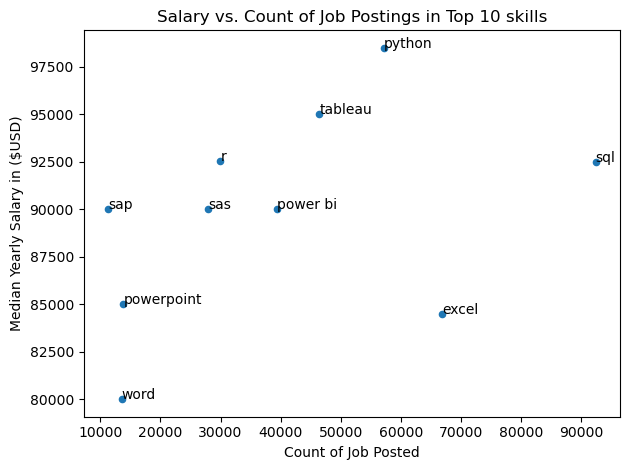

In [ ]:
skill_stats.plot(kind="scatter", x="skill_count", y="median_salary")
plt.title("Salary vs. Count of Job Postings in Top 10 skills")
plt.xlabel("Count of Job Posted")
plt.ylabel("Median Yearly Salary in ($USD)")
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i], txt) #iloc is used to access the column and row
plt.show()

This code is used to add text labels to points on a graph or chart. Here's a simple explanation of how it works:

What it does:
It places text labels (like skill names) next to specific points on a plot. Imagine you have a scatter plot where each point represents a skill, and you want to label each point with its corresponding skill name. This code does exactly that.

How it works step by step:
The Loop (for i, txt in enumerate(skill_stats.index)):

The code goes through each skill in the list of skills (skill_stats.index).
enumerate adds a counter (i) to keep track of the position of each skill in the list. For example:
First skill: i = 0, txt = "Skill A"
Second skill: i = 1, txt = "Skill B"
And so on.
Finding the Coordinates:

For each skill, it finds the exact spot on the graph where the label should go:
X-coordinate: skill_stats["skill_count"].iloc[i]
This is the value in the skill_count column for the current skill (row i).
Y-coordinate: skill_stats["median_salary"].iloc[i]
This is the value in the median_salary column for the current skill (row i).
Placing the Label (plt.text):

The plt.text function places the skill name (txt) at the coordinates found in step 2.
For example, if skill_count = 100 and median_salary = 50000, the skill name will appear at the point (100, 50000) on the graph.
Repeating for All Skills:

The loop repeats this process for every skill in the list, ensuring each point on the graph gets its correct label.
Example:
Imagine you have this data:

Skill	Skill Count	Median Salary
Python	100	50000
Java	200	60000
SQL	150	55000
The code will:

Place "Python" at (100, 50000).
Place "Java" at (200, 60000).
Place "SQL" at (150, 55000).
Why it’s useful:
This makes the graph easier to understand because viewers can see exactly which point represents which skill. It’s like adding name tags to people in a group photo.

Key Points:
The loop goes through each skill one by one.
iloc[i] picks the correct values for the current skill.
plt.text places the skill name at the right spot on the graph.
This is a common technique in data visualization to make plots more informative and readable.